# Exercise 7 - Project

### Introduction
Our project comes from the following Kaggle competition:
https://www.kaggle.com/c/shelter-animal-outcomes/data

### Import Data, libraries

In [25]:
# Comment the following line out if pandas_profiling has not been installed
# Don't use the latest version (1.4.1) due to error - https://bit.ly/2CYViwD
# !pip install pandas_profiling==1.4.0

In [45]:
# Essential Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re, math
from pandas_profiling import ProfileReport

# Matplotlib Inline
%matplotlib inline

In [46]:
dirData = 'data/'
dirImage = 'image/'
train = pd.read_csv(dirData + 'train.csv', parse_dates=['DateTime'])
test = pd.read_csv(dirData + 'test.csv')
sample = pd.read_csv(dirData + 'sample_submission.csv')

### Exploratory Data Analysis

In [47]:
train.head()
#train

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [48]:
train.dtypes

AnimalID                  object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
dtype: object

In [49]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [50]:
test.dtypes

ID                 int64
Name              object
DateTime          object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [58]:
train.describe()

,AgeInDays
count,26711.000000
mean,794.130770
std,1082.830232
min,0.000000
25%,60.000000
50%,365.000000
75%,1095.000000
max,7300.000000


In [59]:
ProfileReport(train)

Number of variables,11
Number of observations,26729
Total Missing (%),7.3%
Total size in memory,2.2 MiB
Average record size in memory,88.0 B
Numeric,1
Categorical,8
Date,1
Text (Unique),1
Rejected,0
Distinct count,44


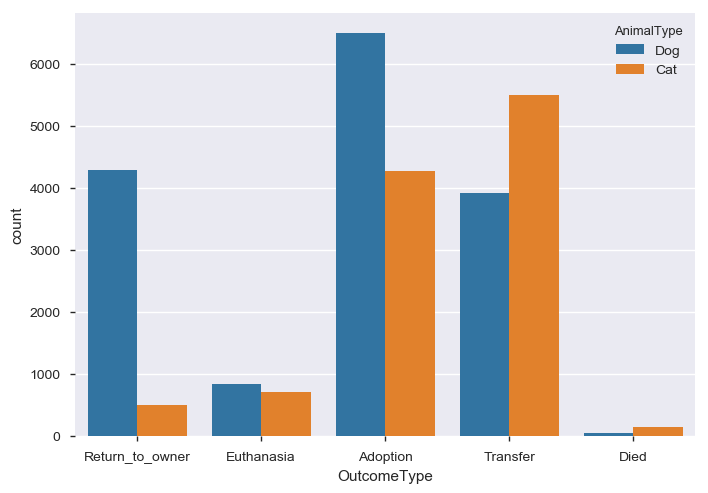

In [60]:
sns.countplot(data = train, x = 'OutcomeType', hue = 'AnimalType')

### (Slight) Changes to Data
Converting the age of each animal into days for better accuracy

In [61]:
train['AgeuponOutcome'].head()

0     1 year
1     1 year
2    2 years
3    3 weeks
4    2 years
Name: AgeuponOutcome, dtype: object

In [62]:
# Age Outcome is in years, months, weeks and days
def daysOfOurLives(col):
    try:
        age = str(col).split(' ')
        value = int(age[0])
        dwmy = age[1]
        
        if (dwmy == 'year') | (dwmy == 'years'):
            return value * 365
        else:
            if (dwmy == 'month') | (dwmy == 'months'):
                # Using 30 as a rough average. It's not *great* but it'll have to do.
                # As an alternative, you could use weeks (roughly 4 1/3 weeks in a month),
                # but you'll still have some inaccuracy. I blame the data :P 
                return value * 30
            else:
                if (dwmy == 'weeks') | (dwmy == 'week'):
                    return value * 7
                else: 
                    if (dwmy == 'days') | (dwmy == 'day'):
                        return value
                    else:
                        return 0
    except:
        pass
    
train['AgeInDays'] = train['AgeuponOutcome'].apply(daysOfOurLives)
train['AgeInDays'].head()

0    365.0
1    365.0
2    730.0
3     21.0
4    730.0
Name: AgeInDays, dtype: float64

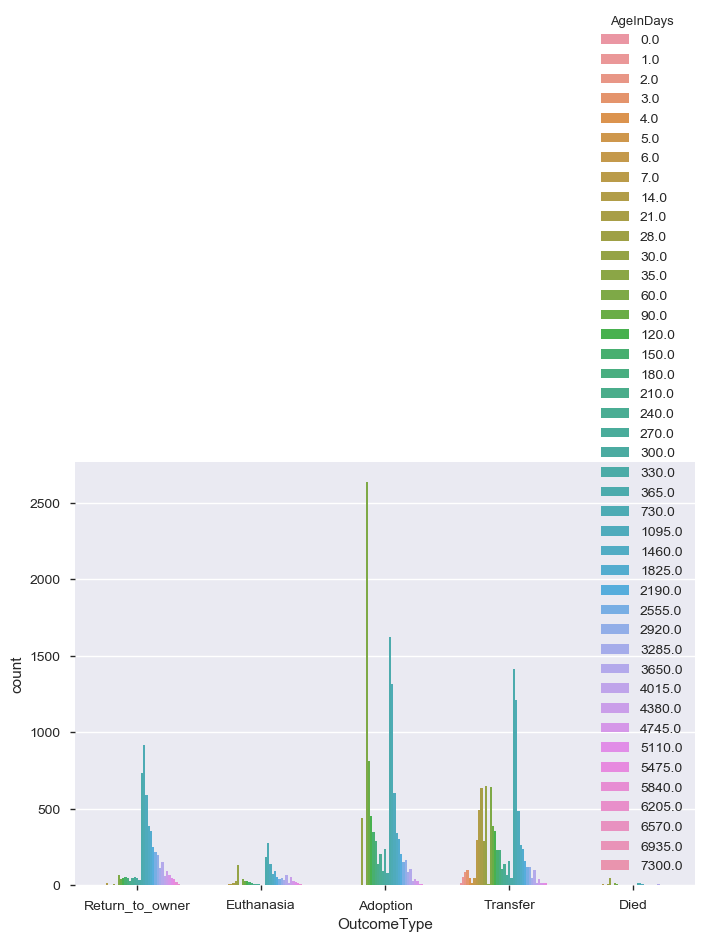

In [63]:
# In hindsight this was a bad idea!
daysAndOutcome = sns.countplot(data = train, x = 'OutcomeType', hue = 'AgeInDays')

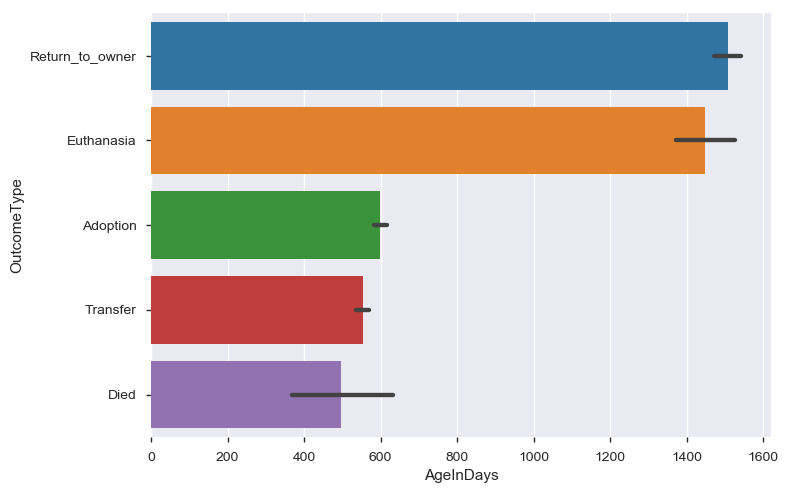

In [66]:
# Not sure if this is better?
sns.barplot(data=train, y = 'OutcomeType', x ='AgeInDays')

In [67]:
test['AgeInDays'] = test['AgeuponOutcome'].apply(daysOfOurLives)
test['AgeInDays'].head()

0    300.0
1    730.0
2    365.0
3    120.0
4    730.0
Name: AgeInDays, dtype: float64

In [69]:
test.loc[test['AgeInDays'].idxmax()]

ID                                  1680
Name                        Babyblueeyes
DateTime             2014-06-25 13:26:00
AnimalType                           Cat
SexuponOutcome             Neutered Male
AgeuponOutcome                  22 years
Breed             Domestic Shorthair Mix
Color                         Seal Point
AgeInDays                           8030
Name: 1679, dtype: object

At this point I'm making sure the IDs are named the same

In [70]:
def renameId(train, test):
    try:
        if (train == test):
            return train
        else:
            return test
    except:
        pass

# Keep the ID the same
train.rename(columns={train.columns[0]:renameId(train.columns[0], test.columns[0])}, inplace=True)
            
train.head()

,ID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0


In [71]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,300.0
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,730.0
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,365.0
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,120.0
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,730.0


In [72]:
outcomeTypeCount = train['OutcomeType'].value_counts()
outcomeTypeCount

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

### Decide on the estimator/algorithm class

In [73]:
# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [74]:
petModel = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=1)

petParameters = {'max_depth': [3,5,10,15,20],
                 'n_estimators': [4,6,8,10],
                 'min_samples_split':[2,5,7,9],
                 'max_leaf_nodes':[None,2,3,4],
                 'max_features':[None,'auto','log2',0.5,1,2,3,4]}

petClf = GridSearchCV(petModel, petParameters, cv = 5)

In [75]:
train.head()

,ID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730.0


In [76]:
sample.head()

,ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer
0,1,1,0,0,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,1,0,0,0,0
4,5,1,0,0,0,0


In [78]:
#X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.33, random_state=42)
train.shape

(26729, 11)

In [79]:
# I was checking the shapes due to the error below. Still working on it though :( )
test.shape

(11456, 9)

In [80]:
train.dtypes

ID                        object
Name                      object
DateTime          datetime64[ns]
OutcomeType               object
OutcomeSubtype            object
AnimalType                object
SexuponOutcome            object
AgeuponOutcome            object
Breed                     object
Color                     object
AgeInDays                float64
dtype: object

In [81]:
test.dtypes

ID                  int64
Name               object
DateTime           object
AnimalType         object
SexuponOutcome     object
AgeuponOutcome     object
Breed              object
Color              object
AgeInDays         float64
dtype: object

In [82]:
# Where I last was. Need to get this fitted properly
petClf.fit(train, sample)

ValueError: Found input variables with inconsistent numbers of samples: [26729, 11456]

### Fit (train) the learner

### Predict